# Title of ML Project: Breast Cancer Detection Using Machine Learning

### Presented by: Jisha Varghese (Data Science Enthusiast)

### 1. Overview of Problem Statement:
Breast cancer poses a significant health risk to women worldwide, making early and accurate
detection vital for successful treatment and patient outcomes. However, diagnosing breast
cancer can be challenging due to the complexity of cellular features and the need for specialized
expertise. Developing a reliable classification model can support healthcare professionals in
detecting cancer at an early stage, ultimately enhancing patient care and enabling timely
interventions. outcomes. However, diagnosing breast cancer can be challenging due to the complexity of cellular features and the need for specialized expertise. Developing a reliable classification model can support healthcare professionals in detecting cancer at an early stage, ultimately enhancing patient care and enabling timely interventions.

### 2. Objective:
The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.


### 3.Data Description:

### Source: The dataset used in this project is the Breast Cancer Wisconsin (Diagnostic) dataset, available from the scikit-learn library.

### Features: The dataset includes 30 features describing various characteristics of cell nuclei in breast tissue, which are computed from digital images. Key features include:

Radius (mean, worst, SE) - average size of cell nuclei
Texture (mean, worst, SE) - variation in gray-scale intensity
Perimeter (mean, worst, SE) - boundary length of the nuclei
Area (mean, worst, SE) - area of the cell nuclei
Smoothness (mean, worst, SE) - smoothness of cell edges
Compactness, Concavity, Concave Points (mean, worst, SE) - measures of cell shape and boundary
Symmetry (mean, worst, SE) - symmetry of the cell nuclei
Fractal Dimension (mean, worst, SE) - complexity of cell shape

### 4.Data Collection:
### Import the Dataset: 
Load the Breast Cancer Wisconsin dataset directly from the scikit-learn library using the following code:

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [11]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
# 1. Load Data
cancer_data = load_breast_cancer()

In [15]:
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
df['target']=cancer_data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [19]:
import warnings
warnings.filterwarnings("ignore") # to prevent warning msgs

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Gain Insights:
### Data Distribution:
Using Plot histograms I examined to understand the distribution of each feature (e.g., mean radius, texture) to see how values vary and to spot any outliers that might impact the model.

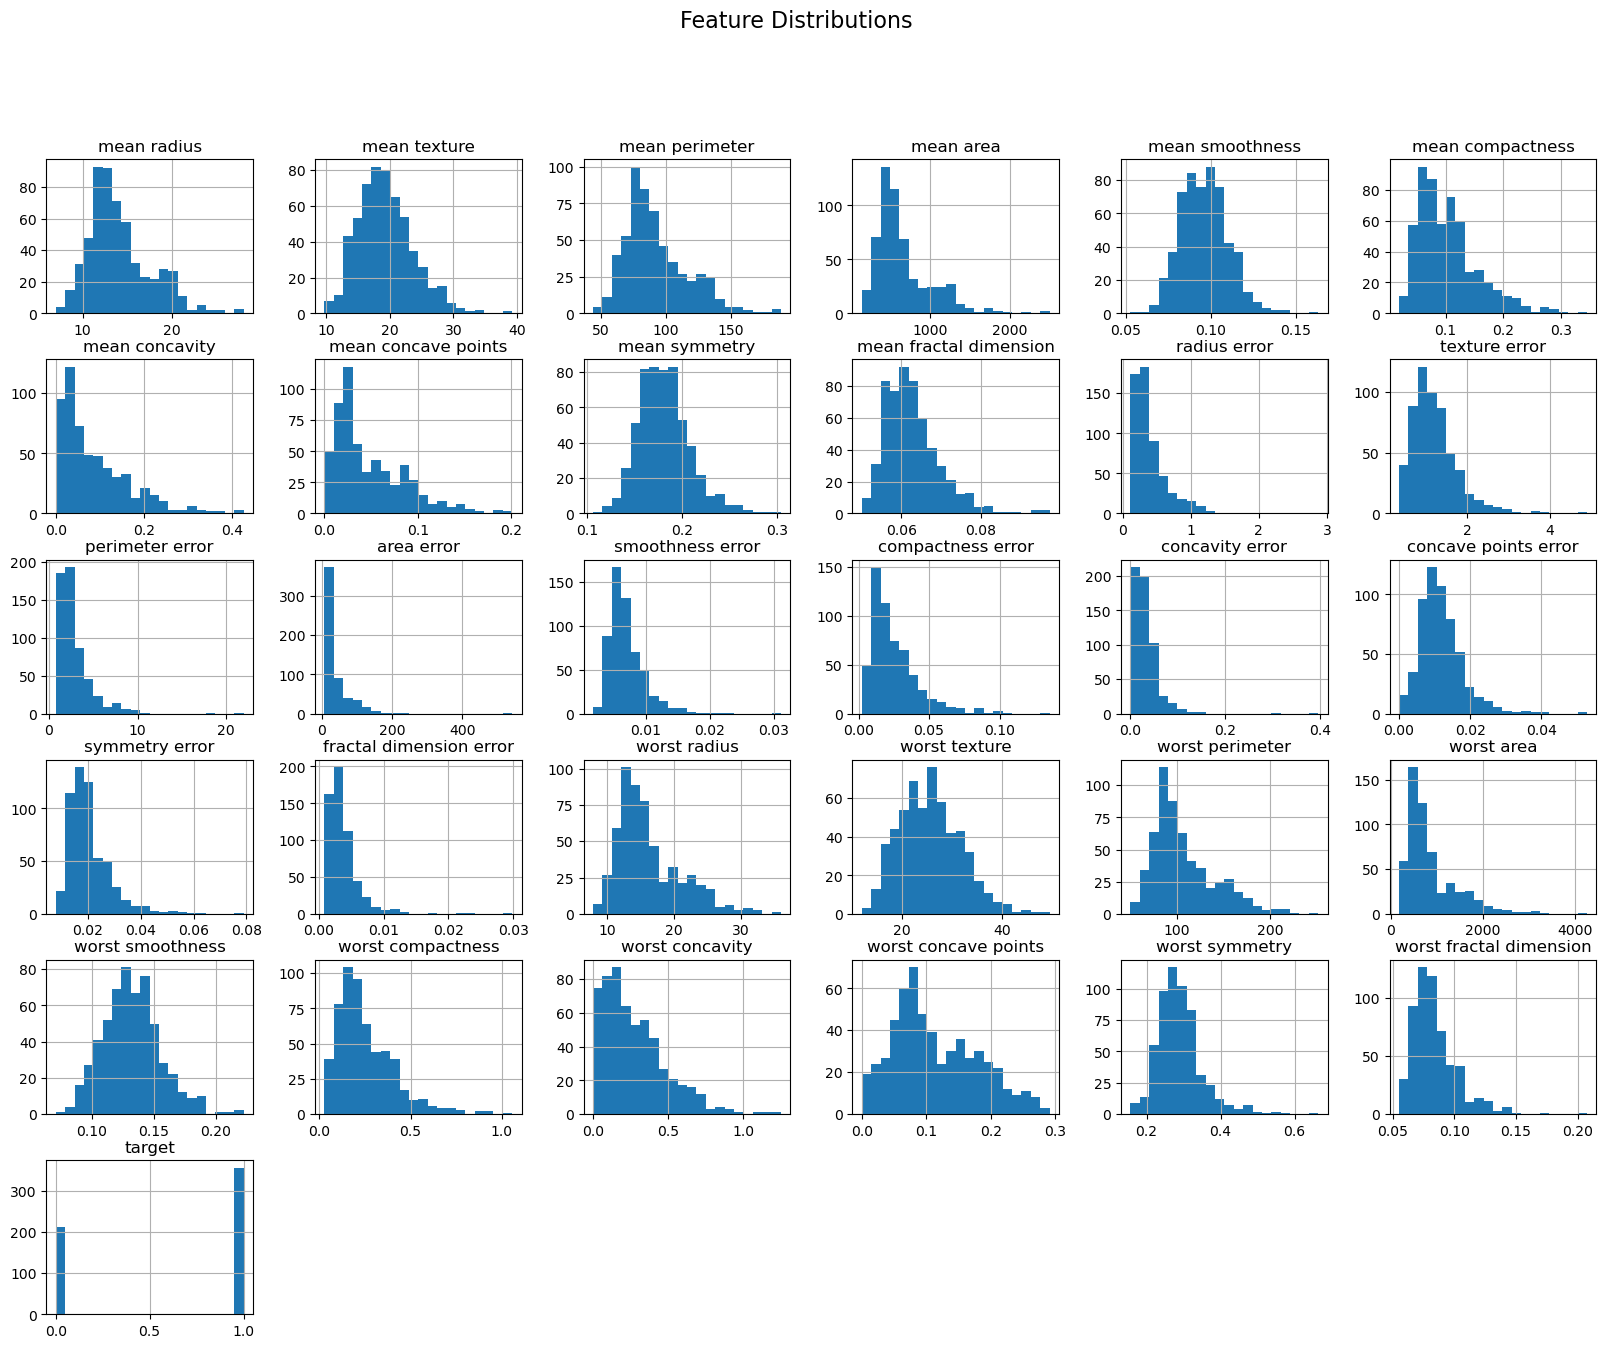

In [816]:
# Plot histograms for each feature
df.hist(figsize=(20, 15), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### Relationships and Patterns: 
 Used a correlation heatmap and pair plot to identify relationships and dependencies among features.

In [ ]:
corr=df.corr()
df

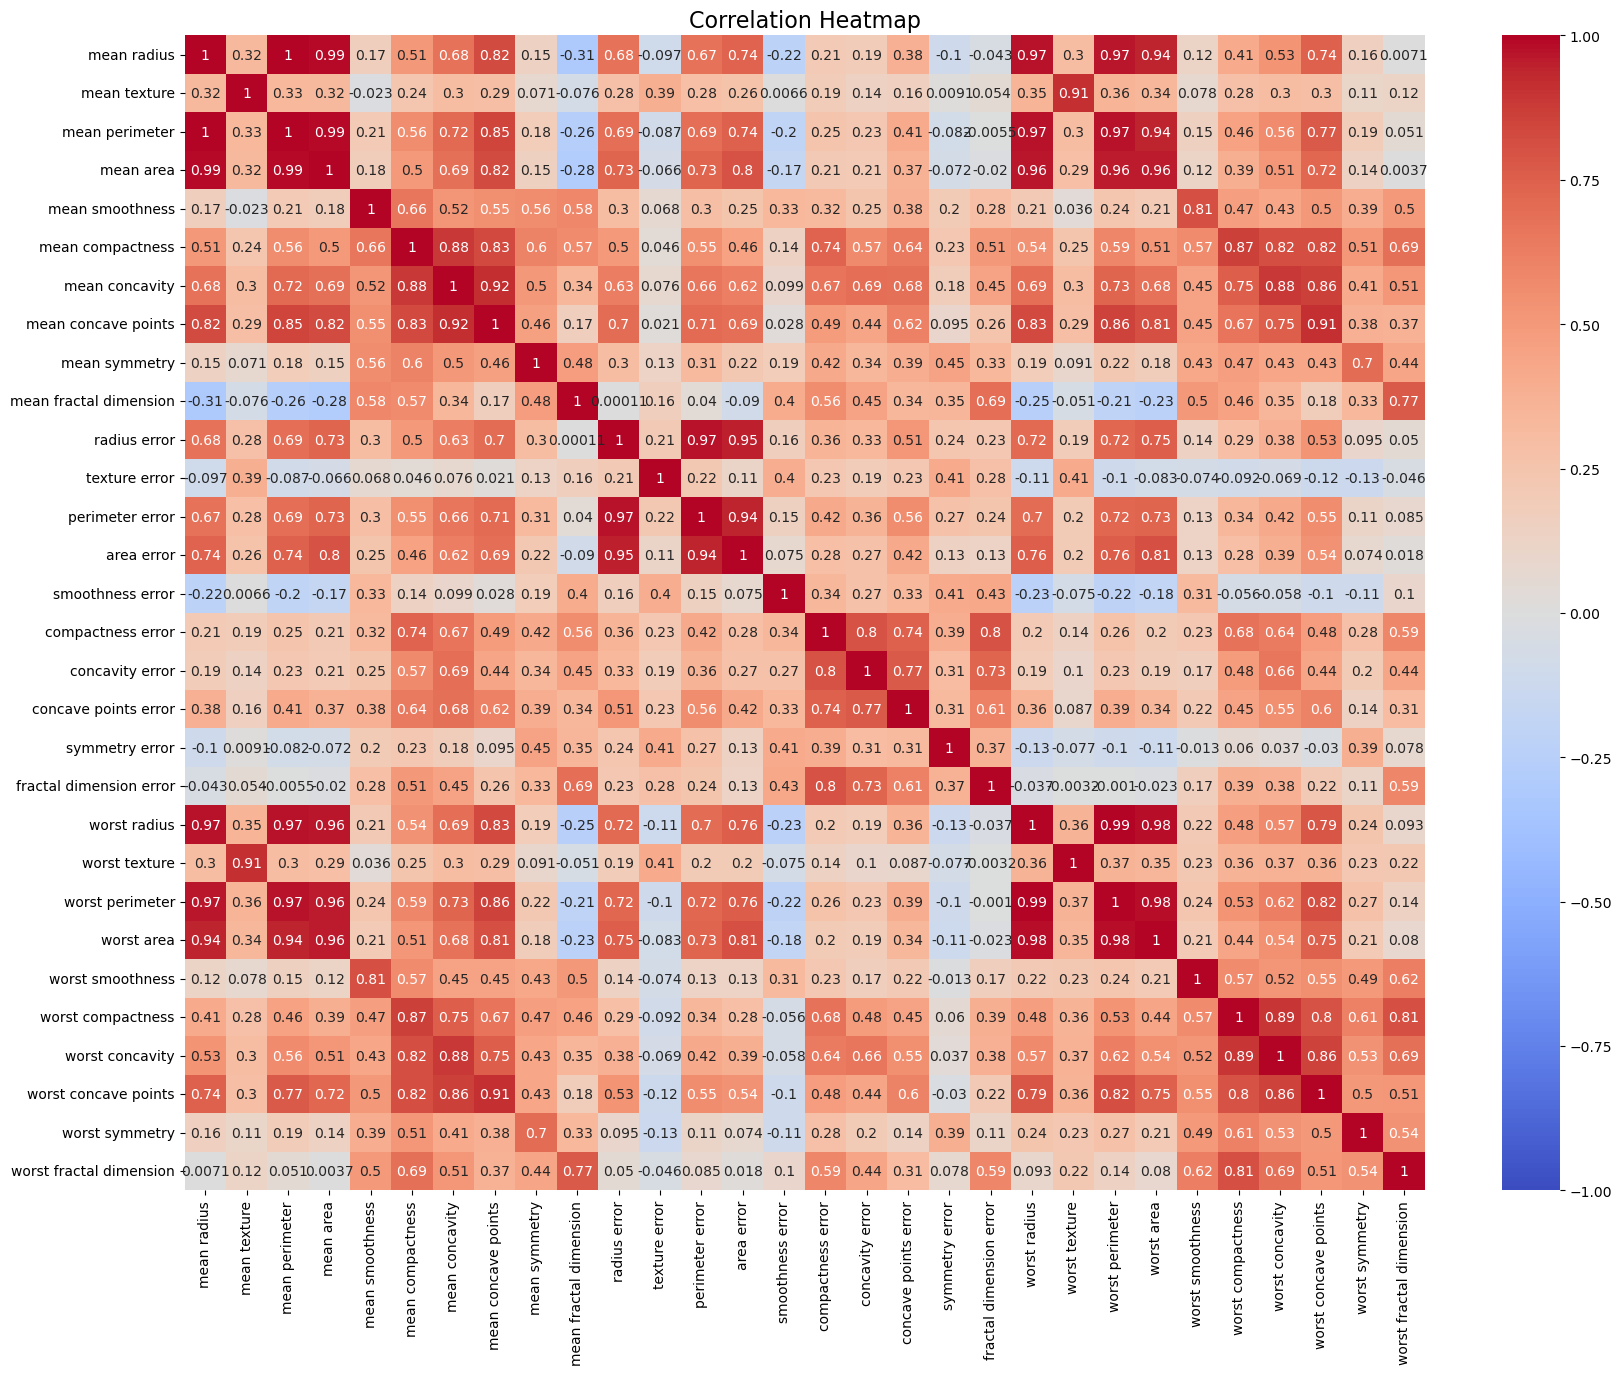

In [18]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

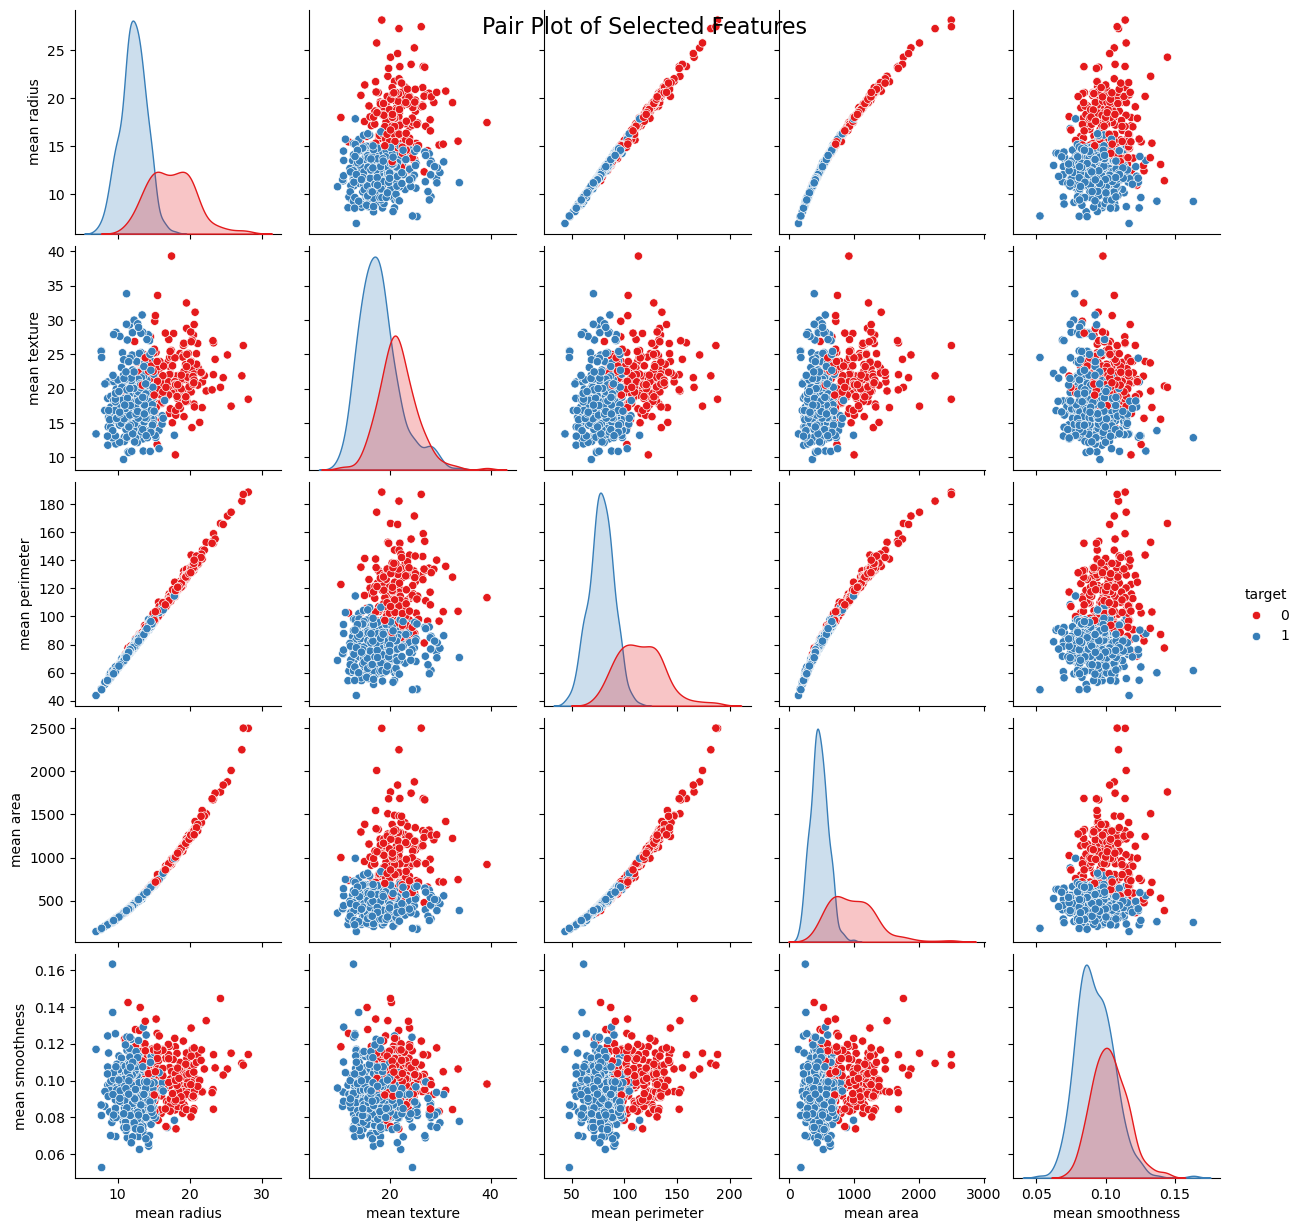

In [824]:
# Pair plot for selected features to explore relationships
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(df, vars=selected_features, hue='target', palette='Set1')
plt.suptitle("Pair Plot of Selected Features", fontsize=16)
plt.show()

### Potential Patterns:
Key features like perimeter and compactness showed clear differences between malignant and benign tumors, helping in feature selection for the model.

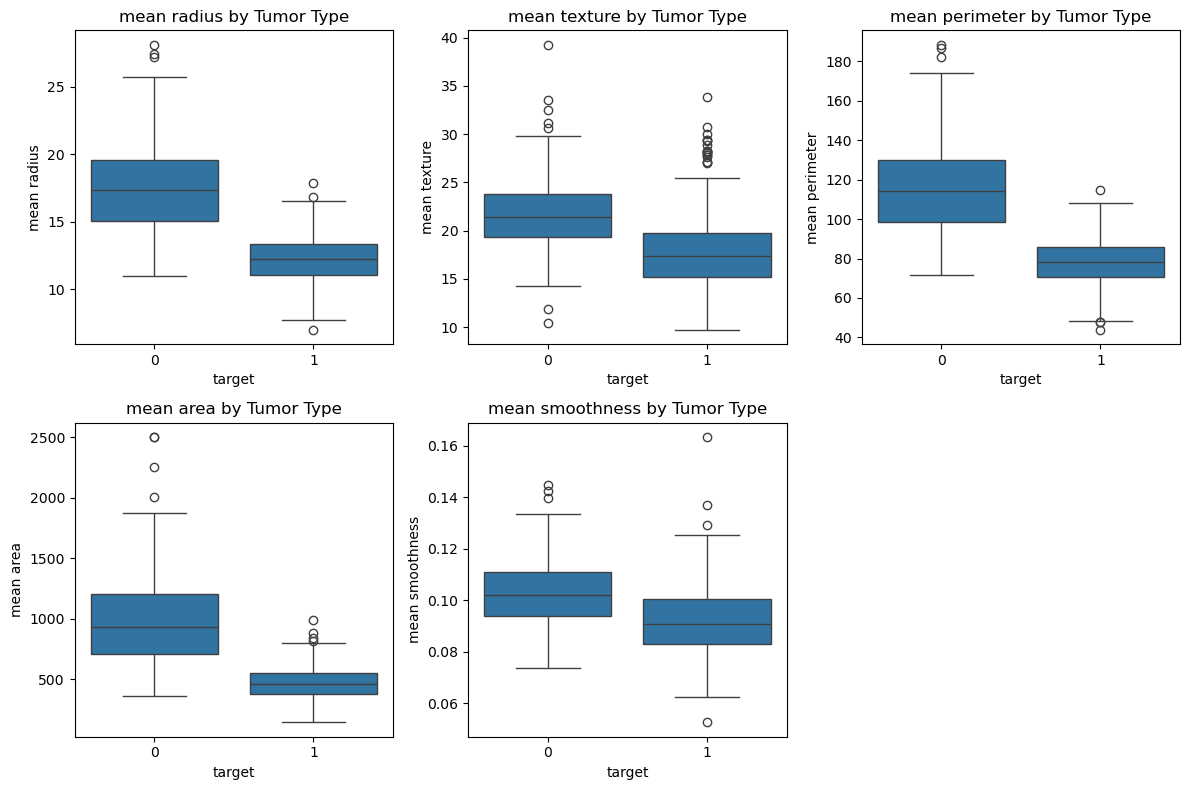

In [839]:
# Box plot to examine differences in key features by target
plt.figure(figsize=(12, 8))
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"{feature} by Tumor Type")
plt.tight_layout()
plt.show()


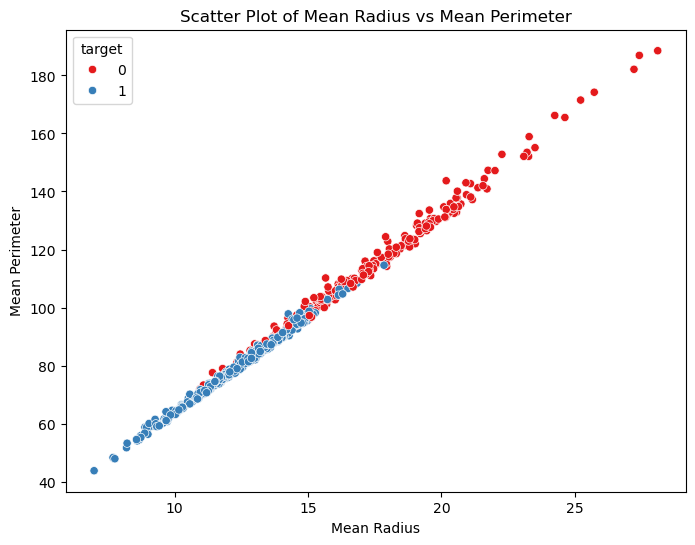

In [841]:
# Scatter plot for two highly correlated features by target
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean radius', y='mean perimeter', hue='target', data=df, palette='Set1')
plt.title("Scatter Plot of Mean Radius vs Mean Perimeter")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Perimeter")
plt.show()

### 5. Data Preprocessing - Data Cleaning:
### Check for Missing Values
### Check for Outliers
### Check for Skewed Data

### Missing Values and duplicated values: Checked for missing data; if present, would use imputation techniques like mean or median.

In [630]:
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [845]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [634]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [636]:
df.duplicated().sum()

0

In [21]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('numerical_columns:',numerical_columns)
print('categorical_columns:', categorical_columns)

numerical_columns: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
categorical_columns: Index([], dtype='object')


## Outlier Detection and Removal

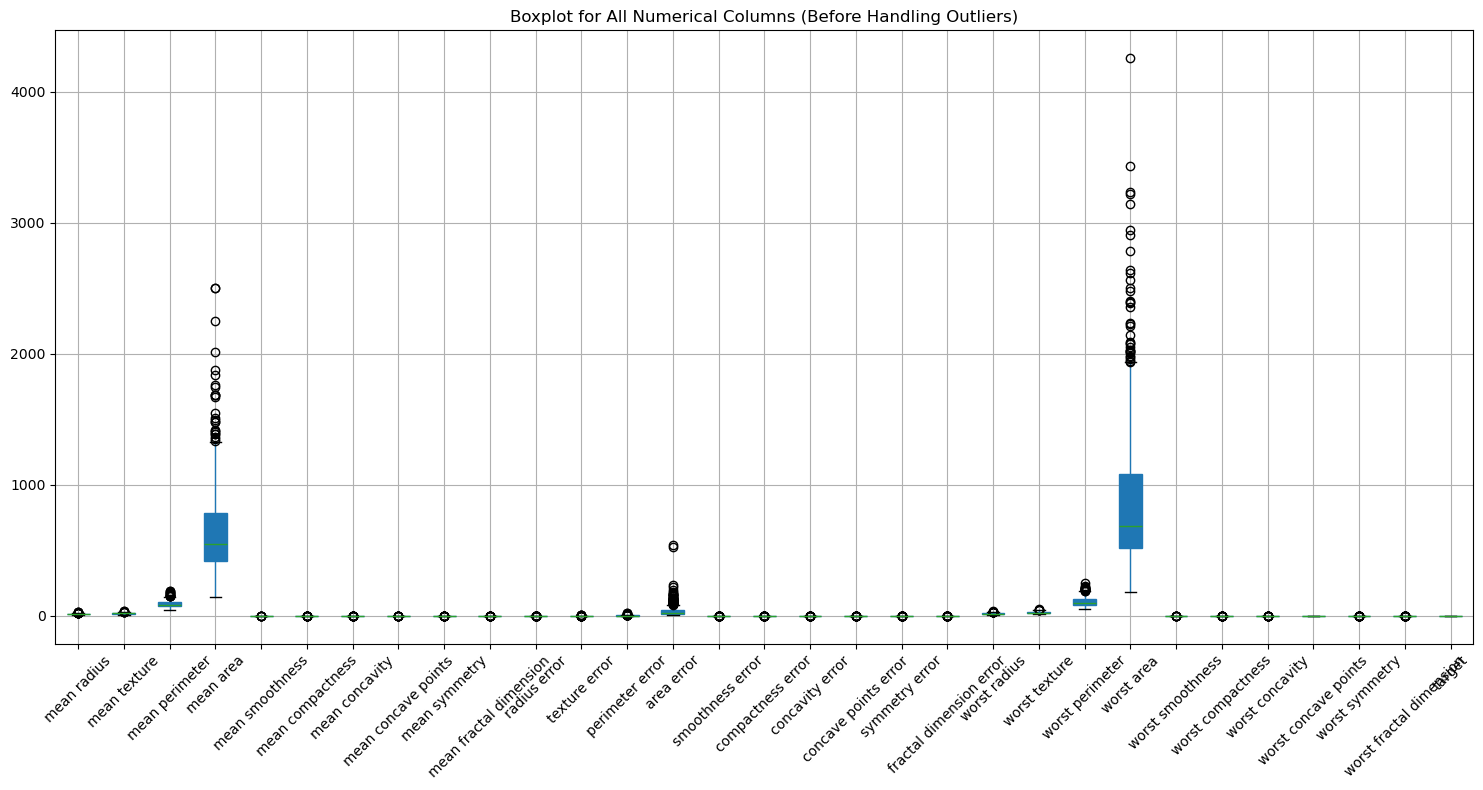

In [41]:
# Boxplot for all numerical columns before handling outliers
plt.figure(figsize=(15, 8))  # Set figure size
df[numerical_columns].boxplot(rot=45, patch_artist=True)  # Single box plot for all numerical columns
plt.title('Boxplot for All Numerical Columns (Before Handling Outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:

# calculate IQR and print limits
df_new = df.copy()  # Create a copy of the DataFrame

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap the outliers to the lower and upper limits
    df_new[col] = df_new[col].clip(lower=lower_limit, upper=upper_limit)
    # Print the IQR, Q1, Q3, and limits
    print('lower limits:',lower_limit)
    print('upper_limit:', upper_limit)
    print('Q1:',Q1)
    print('Q3:',Q3)
    print('IQR:',IQR)
    

lower limits: 5.579999999999999
upper_limit: 21.9
Q1: 11.7
Q3: 15.78
IQR: 4.08
lower limits: 7.725000000000003
upper_limit: 30.244999999999997
Q1: 16.17
Q3: 21.8
IQR: 5.629999999999999
lower limits: 31.775000000000013
upper_limit: 147.49499999999998
Q1: 75.17
Q3: 104.1
IQR: 28.929999999999993
lower limits: -123.30000000000001
upper_limit: 1326.3000000000002
Q1: 420.3
Q3: 782.7
IQR: 362.40000000000003
lower limits: 0.057975
upper_limit: 0.133695
Q1: 0.08637
Q3: 0.1053
IQR: 0.018930000000000002
lower limits: -0.03329999999999997
upper_limit: 0.22861999999999996
Q1: 0.06492
Q3: 0.1304
IQR: 0.06547999999999998
lower limits: -0.12215000000000001
upper_limit: 0.28241000000000005
Q1: 0.02956
Q3: 0.1307
IQR: 0.10114000000000001
lower limits: -0.060224999999999994
upper_limit: 0.15453499999999998
Q1: 0.02031
Q3: 0.074
IQR: 0.053689999999999995
lower limits: 0.11119999999999995
upper_limit: 0.24640000000000006
Q1: 0.1619
Q3: 0.1957
IQR: 0.033800000000000024
lower limits: 0.045070000000000006
upp

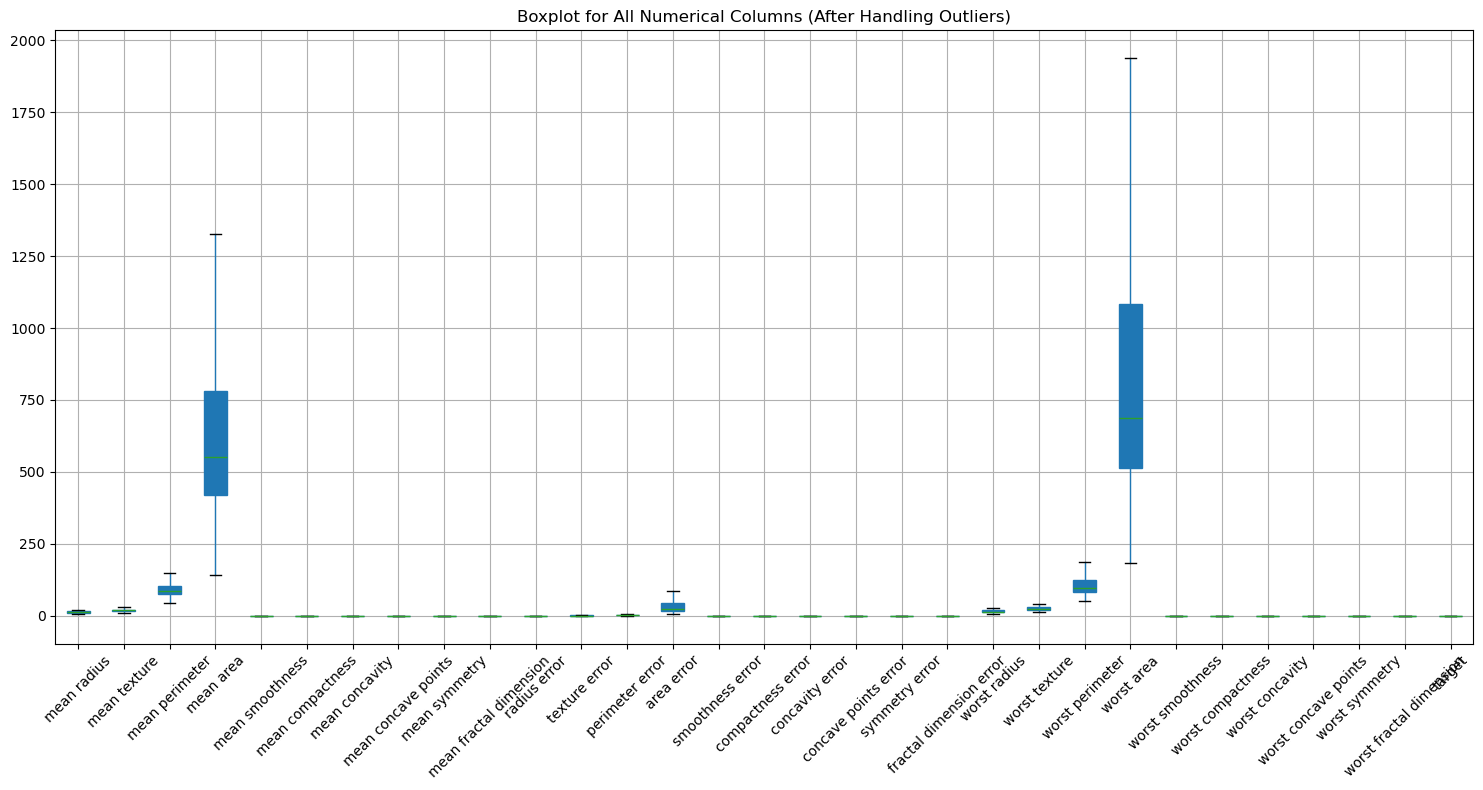

In [662]:
plt.figure(figsize=(15, 8))
df_new[numerical_columns].boxplot(rot=45, patch_artist=True)
plt.title('Boxplot for All Numerical Columns (After Handling Outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Addressing Skewed Data

In [19]:
# Use PowerTransformer to make data more normal (log, square root also options)
pt = PowerTransformer()
df[df.columns[:-1]] = pt.fit_transform(df[df.columns[:-1]])
# Print the transformed data to inspect
print("Transformed Data (After PowerTransformer):")
print(df.head()) 

Transformed Data (After PowerTransformer):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.134881     -2.678666        1.259822   1.126421         1.504114   
1     1.619346     -0.264377        1.528723   1.633946        -0.820227   
2     1.464796      0.547806        1.454664   1.461645         0.963977   
3    -0.759262      0.357721       -0.514886  -0.836238         2.781494   
4     1.571260     -1.233520        1.583340   1.595120         0.343932   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          2.165938        1.862988             1.848558       1.953067   
1         -0.384102        0.291976             0.820609       0.102291   
2          1.163977        1.403673             1.683104       0.985668   
3          2.197843        1.642391             1.423004       2.360528   
4          0.762392        1.407479             1.410929       0.090964   

   mean fractal dimension  ...  worst texture  wo

In [873]:
# Final data overview
print(df.describe())

        mean radius  mean texture  mean perimeter     mean area  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean   1.539717e-14  2.435076e-15    1.324931e-14 -3.506510e-14   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -3.285652e+00 -2.973956e+00   -3.319382e+00 -3.336713e+00   
25%   -6.479948e-01 -6.915292e-01   -6.512769e-01 -6.449335e-01   
50%   -5.640450e-02  8.292759e-04   -7.175492e-02 -5.660323e-02   
75%    6.294470e-01  6.640626e-01    6.646165e-01  6.568408e-01   
max    2.629696e+00  3.348978e+00    2.604984e+00  2.673733e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      5.307217e-15     -3.721296e-15    9.990056e-17         7.367666e-16   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.834325e+00     -2.477742e+00   -1.658319e+00        -1.84539

### 6. Exploratory Data Analysis (EDA):
### -Gain insights into the data distribution, relationships, and potential patterns.### - Visualizations Histogram, Boxplot, Pair Plot, Heatmap Correlation,
### Pi Diagram, Bar Plot, Count Plot, Line Plot, Kernel Density Estimatin (KDE)s.

EDA is about understanding the data in-depth so we can make insightful, data-driven decisions that enhance our model.
Goal: Dive deeper into the data to gain insights, spot patterns, and understand feature relationships.
Tasks: Visualize distributions, examine feature relationships, understand the structure of the data,check feature importance, and identify patterns that may influence modeling.
Outcome: A well-rounded understanding of the dataset, which guides feature selection, transformation, and model-building decisions.

### (i). Data Distribution
Purpose: Understand how values of each feature are spread out. This can help in identifying any skewness or unusual peaks 
(e.g., if most values are clustered around certain points).
### Techniques:
Histograms: Show the distribution of a single variable by splitting data into bins and displaying the frequency of values in each bin.
For example, a histogram of “age” would show how many individuals fall into different age ranges.
Boxplots: Display the median, quartiles, and potential outliers, which helps to visualize the spread and any extreme values in each feature.
Kernel Density Estimation (KDE): Provides a smooth curve representing the distribution of data, useful for continuous variables.
KDE with Histogram: can add a KDE curve on top of a histogram to get a more detailed look at the data distribution.

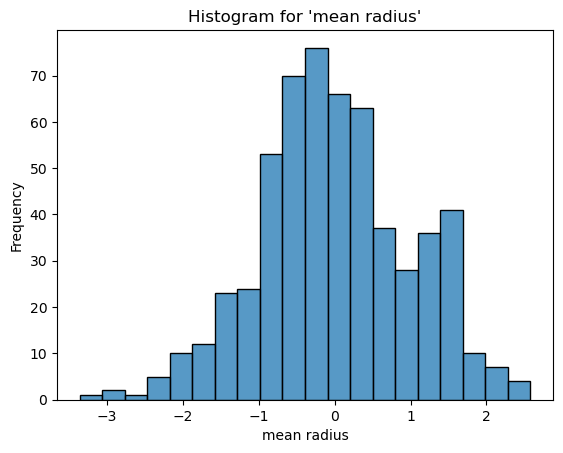

In [900]:
# mean radius as an example feature for visualization
feature = 'mean radius'

# 1. Histogram (without KDE)
sns.histplot(df[feature], kde=False)
plt.title(f"Histogram for '{feature}'")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.show()

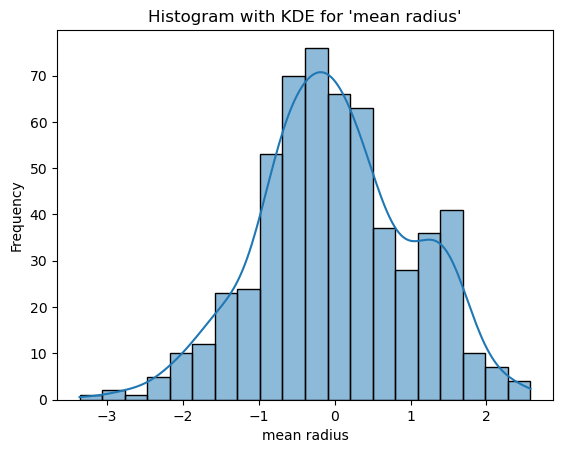

In [902]:
# 1. Histogram with KDE
sns.histplot(df[feature], kde=True)
plt.title(f"Histogram with KDE for '{feature}'")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.show()

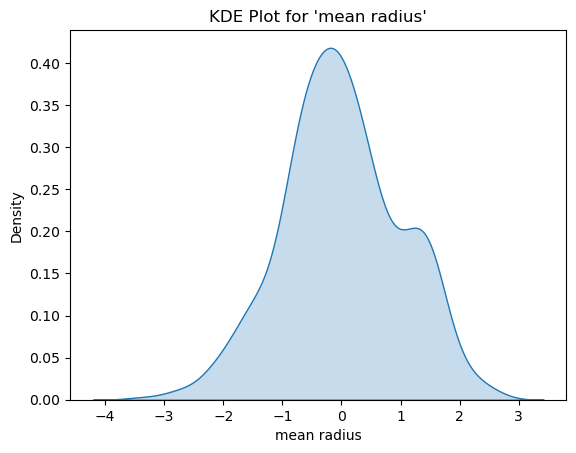

In [904]:
# 2. Standalone KDE plot
sns.kdeplot(df[feature], fill=True)
plt.title(f"KDE Plot for '{feature}'")
plt.xlabel(feature)
plt.ylabel("Density")
plt.show()

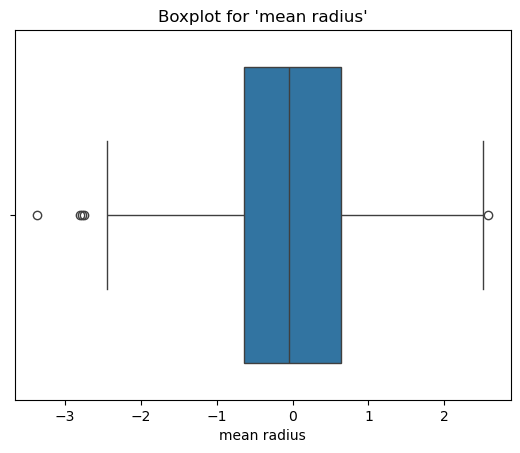

In [906]:
# 3. Boxplot for outlier detection and spread
sns.boxplot(x=df[feature])
plt.title(f"Boxplot for '{feature}'")
plt.xlabel(feature)
plt.show()

### (ii) Relationships Between Features
Purpose: Explore how features relate to each other, which can help in feature selection or engineering. For instance, highly correlated features may be redundant.
### Techniques:
Correlation Matrix & Heatmap: Shows correlation values between numerical features. A heatmap of this matrix helps quickly identify strong relationships.
Pair Plot: Shows scatter plots between every pair of features, useful for identifying trends or clusters.

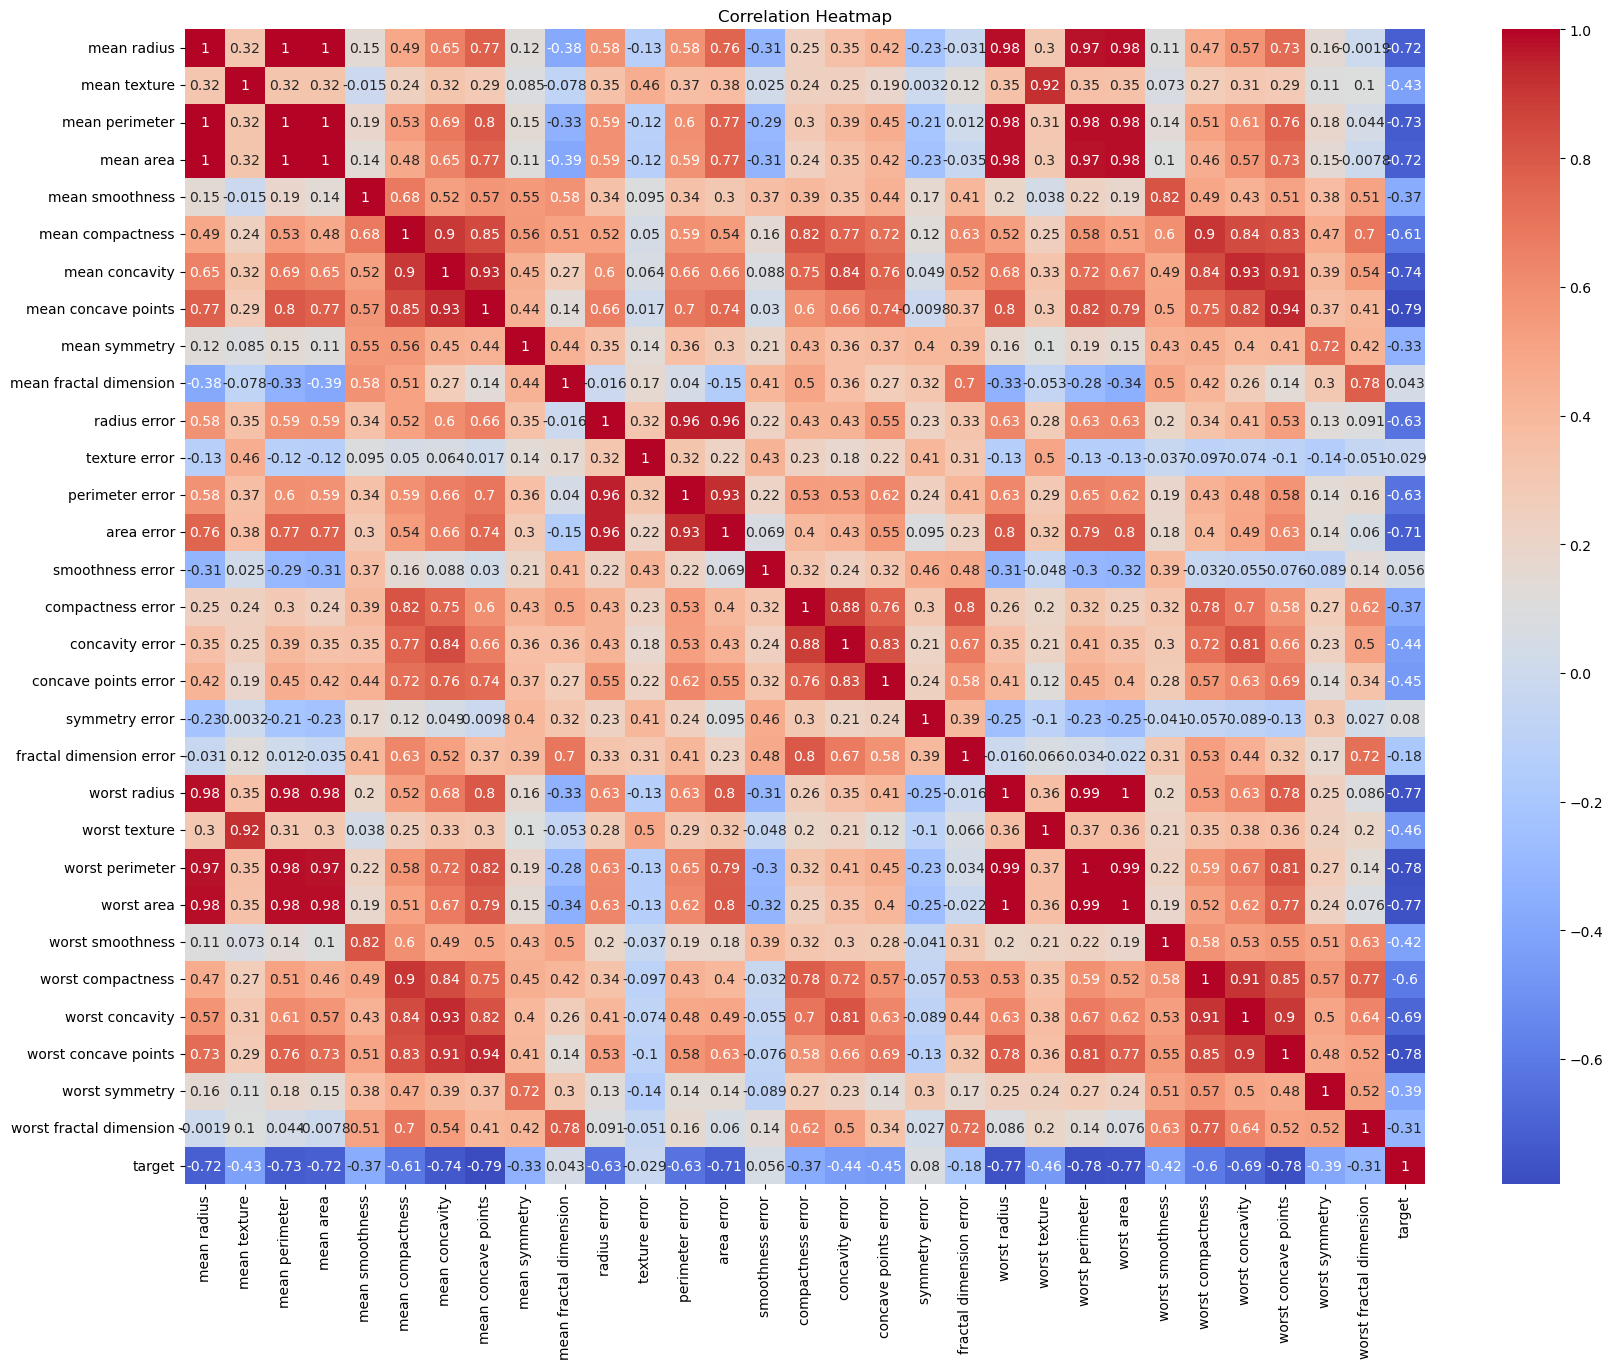

In [47]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### (iii). Potential Patterns
Purpose: Identify any feature trends or patterns that could be useful in modeling, such as features that seem to differentiate target classes (e.g., malignant vs. benign tumors).
### Techniques:
Boxplots by Category: Show how a feature's values differ across categories of a target variable. For instance, plotting “mean radius” by tumor type could reveal differences between malignant and benign tumors.
Bar Plots: Good for categorical features, showing the count or mean of a feature within each target category.
Use Boxplots: If the feature is numerical, boxplots are great for showing how values vary across target categories.
Use Bar Plots: If you're working with categorical features or want to summarize averages or counts, bar plots are better.

In [21]:
print(df.columns)


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


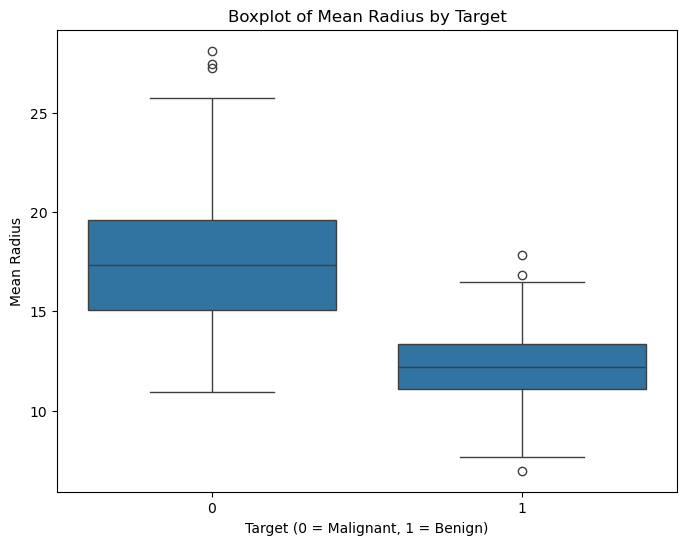

In [19]:
# Boxplot for a single feature ('mean radius') by 'target'
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='mean radius', data=df)
plt.title('Boxplot of Mean Radius by Target')
plt.xlabel('Target (0 = Malignant, 1 = Benign)')
plt.ylabel('Mean Radius')
plt.show()


### 7. Feature Engineering:
### Identify and encode categorical features using techniques like one-hot encoding or label encoding.
### NOTE : Here dataset is already numeric, so there's no need for one-hot encoding.

### 8. Feature Selection:
 - Use algorithms like Random Forest and Select K Best to identify relevant
features.
 - Remove redundant or irrelevant features

## y is target variable (dependent variable)

In [25]:
y = df_new['target']

In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [29]:
x = df_new.drop('target', axis=1)

In [29]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


## Feature Selection Using VarianceThreshold

In [31]:
# 1.1 Variance Threshold
var_threshold = VarianceThreshold(threshold=0.1)
X_var = var_threshold.fit_transform(x)
var_selected = x.columns[var_threshold.get_support()].tolist()

print("1. Filter Methods Results:")
print("\na) Variance Threshold")
print(f"Features selected: {len(var_selected)}")
print("Selected features:", var_selected[:5], "...")

1. Filter Methods Results:

a) Variance Threshold
Features selected: 11
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'texture error'] ...


### (i). Random Forest for Feature Importance
Here this helps to identify the most impactful features for prediction.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_var, y)  # Fit random forest model on the selected features
importances = rf.feature_importances_
important_features = x.columns[importances.argsort()[::-1]]

print("\nTop features from Random Forest:")
print(important_features[:10])  # Show top 10 important features




Top features from Random Forest:
Index(['radius error', 'mean fractal dimension', 'mean concave points',
       'mean perimeter', 'mean area', 'mean symmetry', 'mean radius',
       'mean concavity', 'mean texture', 'mean compactness'],
      dtype='object')


### (ii) Select K Best for feature selection

In [37]:
# Select K Best for feature selection
k_best = SelectKBest(f_classif, k=10)  # Selecting top 10 features
X_selected = k_best.fit_transform(X_var, y)  # Apply SelectKBest

# Show selected features
selected_features = pd.DataFrame(X_var, columns=var_selected).columns[k_best.get_support()]
print("\nTop features from SelectKBest:")
print(selected_features.tolist())  # Show selected features as a list



Top features from SelectKBest:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


### 9. Split Data into Training and Testing Sets:
 - Divide the dataset into training and testing subsets.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
# Split data into training and testing subsets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [47]:
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)


Training data shape: (455, 10) (455,)
Testing data shape: (114, 10) (114,)


### 10. Feature Scaling:
 - Scale numerical features if necessary to ensure uniform magnitude using
techniques like Min-Max scaling or Standardization.

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
# Create scalers
standard_scaler = StandardScaler()  #standardized : entire data into standard form
minmax_scaler = MinMaxScaler()      # minmax : entire data into normalized form

In [47]:
# Apply scaling to training data
X_standardized = standard_scaler.fit_transform(x_train)  
X_normalized = minmax_scaler.fit_transform(x_train)     

In [49]:
# Convert scaled arrays back into DataFrames with original column names
X_standardized_df = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized_df = pd.DataFrame(X_normalized, columns=selected_features)

In [51]:
# now we can visualize or use these DataFrames
print(X_standardized_df.head())
print(X_normalized_df.head())

   mean radius  mean texture  mean perimeter  mean area  perimeter error  \
0    -1.507479     -0.439910       -1.424482  -1.273885        -0.577968   
1     2.115614      1.801734        2.239408   2.207056         1.262888   
2    -1.464222     -1.281739       -1.406580  -1.239748        -0.051697   
3    -1.020535      1.474222       -1.021895  -0.957137        -0.860393   
4    -1.164726     -1.034285       -1.172974  -1.072348         0.460744   

   area error  worst radius  worst texture  worst perimeter  worst area  
0   -0.703873     -1.279846      -0.478742        -1.292798   -1.103742  
1    1.952535      2.305938       1.334395         2.199540    2.307098  
2   -0.460262     -1.345560      -1.051311        -1.289966   -1.134628  
3   -0.746765     -0.854897       1.620680        -0.900146   -0.826619  
4    0.001976     -1.124324      -1.349315        -1.155622   -1.010874  
   mean radius  mean texture  mean perimeter  mean area  perimeter error  \
0     0.094166      0.3

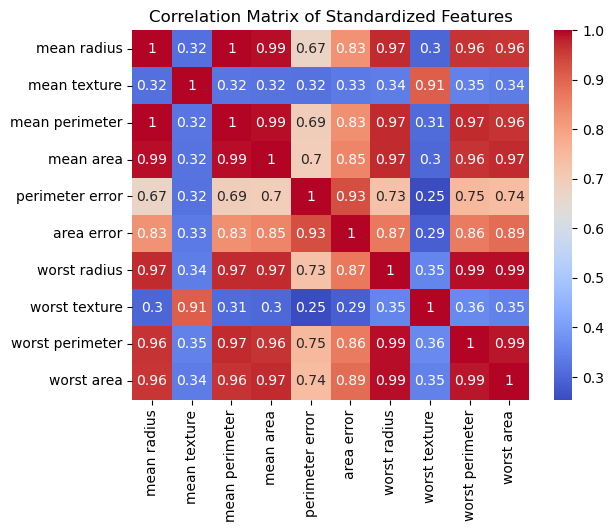

In [93]:
correlation = X_standardized_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Standardized Features")
plt.show()



### 11. Build the ML Model: (at least 5)
 - Implement various classification and regression algorithms:
 - Classification: Logistic Regression, SVM, Decision Tree, MLP Classifier,
Naive Bayes, Random Forest, K-Nearest Neighbors, Gradient Boost, Adaboost.


### 1st ML MODEL-Decision Tree

### Decision Tree Classifier how it works and why suitable
How it works: Splits data into simple decision rules based on feature thresholds to classify tumors.
Why suitable: Handles the non-linear relationships and feature importance well

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


In [61]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5) # norma tree best max_dept 5


In [63]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### 12.Model Evaluation:

In [65]:
y_pred=dt_model.predict(x_test)

In [67]:
accuracy=accuracy_score(y_test,y_pred)

In [69]:
accuracy

0.9385964912280702

In [71]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.93      0.91      0.92        43\n           1       0.94      0.96      0.95        71\n\n    accuracy                           0.94       114\n   macro avg       0.94      0.93      0.93       114\nweighted avg       0.94      0.94      0.94       114\n'

In [73]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[39,  4],
       [ 3, 68]], dtype=int64)

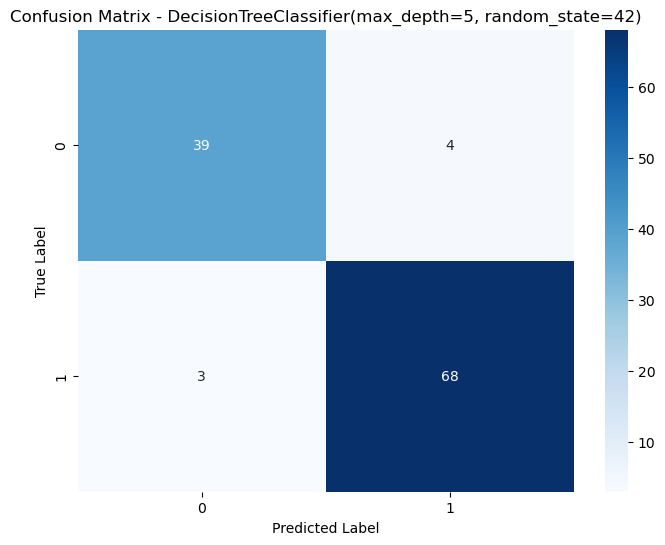

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {dt_model}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 2nd ML MODEL- K-Nearest Neighbors

### k-Nearest Neighbors (k-NN) how it works and why suitable
How it works: Classifies tumors based on the classes of the closest data points.
Why suitable: Simple and effective due to  distinct patterns 

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### 12. Model Evaluation:

In [79]:
y_pred1=knn_model.predict(x_test)

In [81]:
knn_accuracy=accuracy_score(y_test,y_pred1)
knn_accuracy

0.956140350877193

In [83]:
cr1=classification_report(y_test,y_pred1)
cr1

'              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.94        43\n           1       0.93      1.00      0.97        71\n\n    accuracy                           0.96       114\n   macro avg       0.97      0.94      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

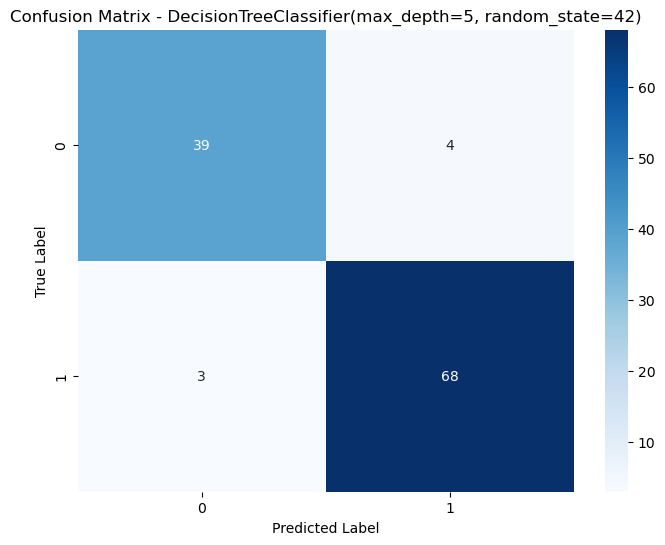

In [124]:
cm1=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {dt_model}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 3rd ML MODEL- Logistic Regression Classifier

### . Logistic Regression how it works and suitable
How it works: Fits a curve to predict the probability of tumors being malignant or benign based on numerical features.
Why suitable: it is binary (malignant or benign) and has scaled numerical features.

In [85]:

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)  # Train Logistic Regression model


LogisticRegression(random_state=42)

### 12. Model Evaluation:

In [87]:
y_pred2 = log_model.predict(x_test)  # Predict using test data

In [89]:
# Evaluate Logistic Regression
log_accuracy = accuracy_score(y_test, y_pred2)
print("Logistic Regression Accuracy:", log_accuracy)


Logistic Regression Accuracy: 0.9649122807017544


In [91]:
log_cr = classification_report(y_test, y_pred2)
print("\nClassification Report (Logistic Regression):")
print(log_cr)



Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [93]:
log_cm = confusion_matrix(y_test, y_pred2)


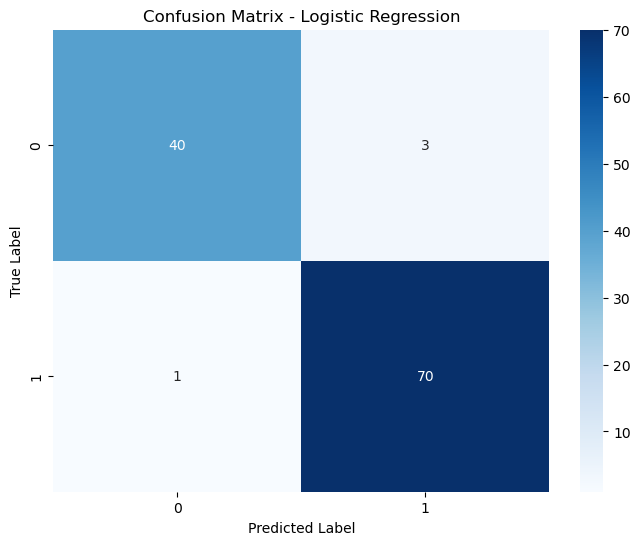

In [141]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### 4th ML MODEL- Support Vector Machine (SVM) Classifier

### Support Vector Machine (SVM) how it works and why suitable
How it works: Finds the best boundary to separate malignant and benign cases using kernel transformations.
Why suitable: Works well with high-dimensional features and handles overlapping class distributions.

In [55]:

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(x_train, y_train)  # Train SVM model


SVC(kernel='linear', probability=True, random_state=42)

### 12. Model Evaluation:

In [57]:
y_pred3 = svm_model.predict(x_test)  # Predict using test data


In [59]:
# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred3)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9649122807017544


In [61]:
svm_cr = classification_report(y_test, y_pred3)
print("\nClassification Report (SVM):")
print(svm_cr)


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [63]:
svm_cm = confusion_matrix(y_test, y_pred3)


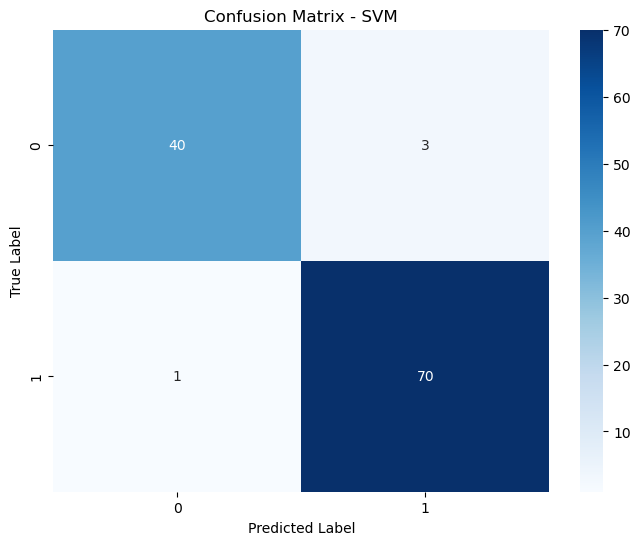

In [65]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 5TH ML MODEL- Random Forest Classifier

### Random Forest Classifier how it works and why suitable
How it works: Uses many decision trees and combines their results for a final prediction.
Why suitable: Effective for dataset as it reduces overfitting and handles noisy features like compactness and texture.

In [67]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)  # Train Random Forest model


RandomForestClassifier(random_state=42)

### 12.Model Evaluation:

In [69]:
y_pred4 = rf_model.predict(x_test)  # Predict using test data


In [71]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred4)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9473684210526315


In [73]:
rf_cr = classification_report(y_test, y_pred4)
print("\nClassification Report (Random Forest):")
print(rf_cr)



Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [75]:
rf_cm = confusion_matrix(y_test, y_pred4)


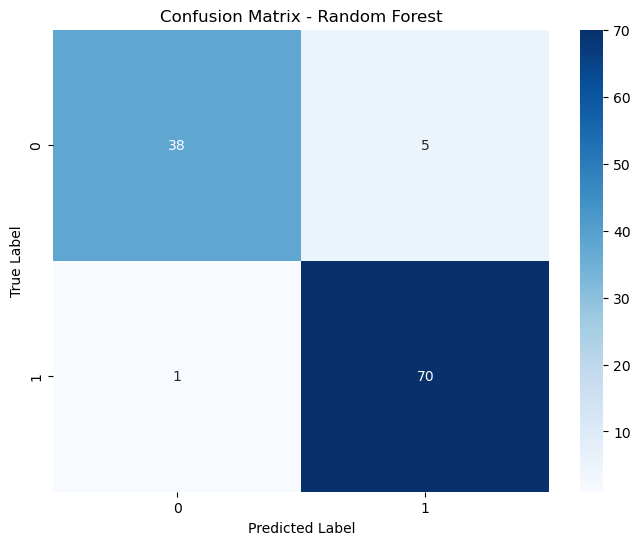

In [77]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 13. Hyperparameter Tuning:
 - Optimize model performance by tuning hyperparameters.

### Hyperparameter Tuning for Decision Tree Classifier with GridSearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(x_train, y_train)

# Best parameters and score
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree Accuracy:", dt_grid.best_score_)


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.9252747252747253


### Hyperparameter Tuning for  K-Nearest Neighbors (KNN) with GridSearchCV

In [77]:
# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(x_train, y_train)

# Best parameters and score
print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN Accuracy:", knn_grid.best_score_)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best KNN Accuracy: 0.9362637362637363


### Hyperparameter Tuning for Logistic Regression with GridSearchCV

In [199]:
# Define the parameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Perform Grid Search
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_param_grid, cv=5, scoring='accuracy')
lr_grid.fit(x_train, y_train)

# Best parameters and score
print("Best Logistic Regression Parameters:", lr_grid.best_params_)
print("Best Logistic Regression Accuracy:", lr_grid.best_score_)


Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.9516483516483516


### Hyperparameter Tuning for RandomForestClassifier with GridSearchCV

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9428571428571428


### Hyperparameter Tuning for Support Vector Machine (SVM) with GridSearchCV

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4]          # Degree for 'poly' kernel
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuracy: 0.9714285714285715


### 14. Save the Model:
 - Save the trained model for future use.

In [95]:
import joblib

# Extract the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

# Print the best model details
print("Best Model Details:")
print(best_model)

print("Model saved as 'best_model.pkl'")


Best Model Details:
SVC(C=1, kernel='poly', random_state=42)
Model saved as 'best_model.pkl'


In [149]:


# List of model names corresponding to the models you passed to GridSearchCV
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']

# Extract mean test scores from GridSearchCV
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Get the index of the worst model (lowest mean test score)
worst_model_index = np.argmin(mean_test_scores)

# Map the worst model index to its name
# Assuming the models are passed in the same order in the grid_search pipeline
worst_model_name = model_names[worst_model_index % len(model_names)]

# Display the name of the worst model
print(f"Worst Model: {worst_model_name}")


Worst Model: Logistic Regression


### 15. Test with Unseen Data:
 - Assess the model's performance on unseen data

In [98]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved model
import joblib
loaded_model = joblib.load('best_model.pkl')

# Predict on unseen test data
y_pred = loaded_model.predict(X_test)

# Evaluate performance
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on Test Data: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


### 16. Interpretation of Results (Conclusion):


In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

# Simple classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix (simplified)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Conclusion based on accuracy
if accuracy > 0.85:
    print("The model is performing well with high accuracy.")
elif accuracy > 0.70:
    print("The model is performing decently, but there is room for improvement.")
else:
    print("The model performance is poor, further tuning is required.")


Accuracy on Test Data: 0.9778

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
The model is performing well with high accuracy.
